In [96]:

from datetime import datetime, timedelta, timezone
import pytz
import json

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
def getCovidMxDate():
    tz = pytz.timezone('America/Mexico_City')
    cdmx_now = datetime.now(tz)

    if (cdmx_now.hour < 19):
        d = cdmx_now - timedelta(days=1)
    else:
        d = cdmx_now

    download_date = d.strftime("%Y%m%d")
    return download_date

In [4]:
download_date = getCovidMxDate()

In [7]:
# Fuente https://datos.covid-19.conacyt.mx//#DownZCSV
URL_confirmados = "https://datos.covid-19.conacyt.mx/Downloads/Files/Casos_Diarios_Estado_Nacional_Confirmados_"+ download_date +".csv"
URL_sospechosos = "https://datos.covid-19.conacyt.mx/Downloads/Files/Casos_Diarios_Estado_Nacional_Sospechosos_"+ download_date +".csv"
URL_negativos = "https://datos.covid-19.conacyt.mx/Downloads/Files/Casos_Diarios_Estado_Nacional_Negativos_"+ download_date +".csv"
URL_defunciones = "https://datos.covid-19.conacyt.mx/Downloads/Files/Casos_Diarios_Estado_Nacional_Defunciones_"+ download_date +".csv"
casos_diarios_confirmados  =  pd.read_csv(URL_confirmados)
casos_diarios_sospechosos  =  pd.read_csv(URL_sospechosos)
casos_diarios_negativos  =  pd.read_csv(URL_negativos)
casos_diarios_defunciones  =  pd.read_csv(URL_defunciones)

In [10]:
casos_diarios_confirmados.head()

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,...,24-11-2021,25-11-2021,26-11-2021,27-11-2021,28-11-2021,29-11-2021,30-11-2021,01-12-2021,02-12-2021,03-12-2021
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,78,70,68,13,15,58,50,56,26,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,497,423,373,122,133,570,486,341,185,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,51,50,54,27,19,57,50,34,25,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,7,5,4,1,3,5,1,3,1,0
4,7,5730367,CHIAPAS,0,0,0,1,0,0,0,...,2,2,2,0,0,5,4,3,2,0


Casos Confirmados acumulados (Acumulados por fecha)

In [11]:
confirmados_acumulados = casos_diarios_confirmados[casos_diarios_confirmados.columns[3:-1]].sum().cumsum()
confirmados_acumulados.name = "Confirmados_Acumulados"

sospechosos_acumulados = casos_diarios_sospechosos[casos_diarios_sospechosos.columns[3:-1]].sum().cumsum()
sospechosos_acumulados.name = "Confirmados_Sospechosos"

negativos_acumulados = casos_diarios_negativos[casos_diarios_negativos.columns[3:-1]].sum().cumsum()
negativos_acumulados.name = "Confirmados_Negativos"

defunciones_acumulados = casos_diarios_defunciones[casos_diarios_defunciones.columns[3:-1]].sum().cumsum()
defunciones_acumulados.name = "Confirmados_Defunciones"

In [12]:
type(confirmados_acumulados)

pandas.core.series.Series

In [13]:
confirmados_acumulados

26-02-2020          0
27-02-2020          8
28-02-2020         12
29-02-2020         16
01-03-2020         20
               ...   
28-11-2021    7777782
29-11-2021    7783884
30-11-2021    7788758
01-12-2021    7792640
02-12-2021    7794886
Name: Confirmados_Acumulados, Length: 646, dtype: int64

Grafica casos acumulados a lo largo del tiempo

In [16]:
confirmados_acumulados.to_csv("./dataset/confirmados_acumulados.csv")
sospechosos_acumulados.to_csv("./dataset/confirmados_sospechosos.csv")
negativos_acumulados.to_csv("./dataset/confirmados_negativos.csv")
defunciones_acumulados.to_csv("./dataset/confirmados_defunciones.csv")

In [17]:
# reading the CSV file
confirmados_acumulados1 = pd.read_csv('./dataset/confirmados_acumulados.csv')
sospechosos_acumulados1 = pd.read_csv("./dataset/confirmados_sospechosos.csv")
negativos_acumulados1 = pd.read_csv("./dataset/confirmados_negativos.csv")
defunciones_acumulados1 = pd.read_csv("./dataset/confirmados_defunciones.csv")

In [18]:
# adding column name to the respective columns
confirmados_acumulados1.columns =['Fecha','Casos_Confirmados']
confirmados_acumulados2 = confirmados_acumulados1.set_index('Fecha')

sospechosos_acumulados1.columns =['Fecha','Casos_Confirmados']
sospechosos_acumulados2 = sospechosos_acumulados1.set_index('Fecha')

negativos_acumulados1.columns =['Fecha','Casos_Confirmados']
negativos_acumulados2 = negativos_acumulados1.set_index('Fecha')

defunciones_acumulados1.columns =['Fecha','Casos_Confirmados']
defunciones_acumulados2 = defunciones_acumulados1.set_index('Fecha')

In [19]:
confirmados_acumulados2

,Casos_Confirmados
Fecha,
26-02-2020,0
27-02-2020,8
28-02-2020,12
29-02-2020,16
01-03-2020,20
...,...
28-11-2021,7777782
29-11-2021,7783884
30-11-2021,7788758


In [20]:
confirmados_acumulados3 = pd.Series(confirmados_acumulados1["Casos_Confirmados"])
sospechosos_acumulados3 = pd.Series(sospechosos_acumulados1["Casos_Confirmados"])
negativos_acumulados3 = pd.Series(negativos_acumulados1["Casos_Confirmados"])
defunciones_acumulados3 = pd.Series(defunciones_acumulados1["Casos_Confirmados"])

In [21]:
confirmados_acumulados3

0            0
1            8
2           12
3           16
4           20
        ...   
641    7777782
642    7783884
643    7788758
644    7792640
645    7794886
Name: Casos_Confirmados, Length: 646, dtype: int64

In [22]:
print(confirmados_acumulados3.index)

RangeIndex(start=0, stop=646, step=1)


In [23]:
type(confirmados_acumulados3)

pandas.core.series.Series

In [24]:
"""
Analisis de las primera y segunda diferencias
"""
# importamos los paquetes usuales
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#t: fecha
#p: número de casos positivos
t_confirmados = confirmados_acumulados3.index
p_confirmados = confirmados_acumulados3.values

t_sospechosos = sospechosos_acumulados3.index
p_sospechosos = sospechosos_acumulados3.values

t_negativos = negativos_acumulados3.index
p_negativos = negativos_acumulados3.values

t_defunciones = defunciones_acumulados3.index
p_defunciones = defunciones_acumulados3.values

In [26]:
confirmados_acumulados

26-02-2020          0
27-02-2020          8
28-02-2020         12
29-02-2020         16
01-03-2020         20
               ...   
28-11-2021    7777782
29-11-2021    7783884
30-11-2021    7788758
01-12-2021    7792640
02-12-2021    7794886
Name: Confirmados_Acumulados, Length: 646, dtype: int64

Text(0, 0.5, 't')

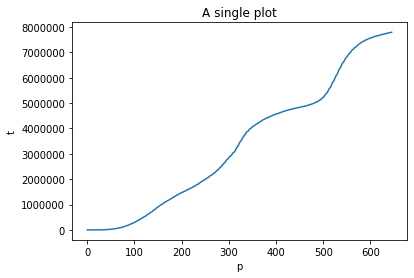

In [27]:
# graficamos el número de casos positivos
fig, ax = plt.subplots()
ax.plot(t_confirmados, p_confirmados)
ax.set_title('A single plot')
ax.set_xlabel('p')
ax.set_ylabel('t')

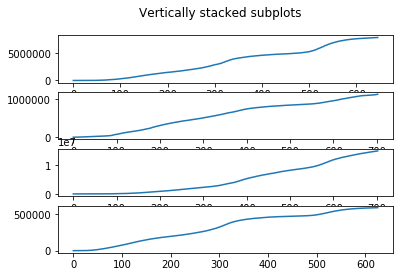

In [28]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(t_confirmados, p_confirmados)
axs[1].plot(t_sospechosos, p_sospechosos)
axs[2].plot(t_negativos, p_negativos)
axs[3].plot(t_defunciones, p_defunciones)

Graficas diferencia de casos acumulados

In [29]:
dp_acumulados_confirmados = np.diff(p_confirmados)
dp_acumulados_sospechosos = np.diff(p_sospechosos)
dp_acumulados_negativos = np.diff(p_negativos)
dp_acumulados_defunciones = np.diff(p_defunciones)

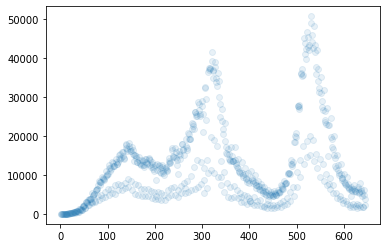

In [68]:
plt.scatter(t_confirmados[1:], dp_acumulados_confirmados, alpha=0.1)
plt.show()

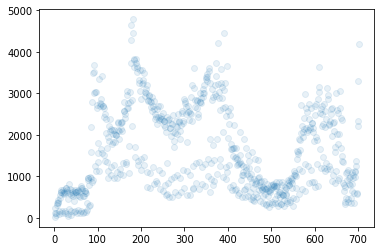

In [69]:
plt.scatter(t_sospechosos[1:], dp_acumulados_sospechosos, alpha=0.1)
plt.show()

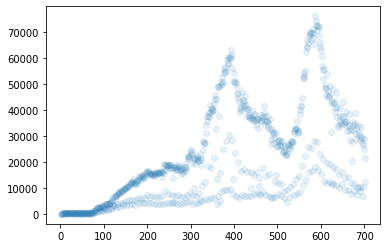

In [70]:
plt.scatter(t_negativos[1:], dp_acumulados_negativos, alpha=0.1)
plt.show()

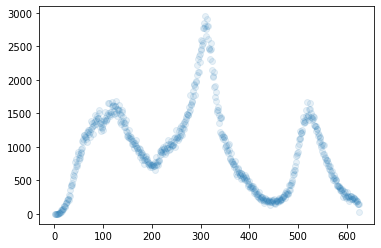

In [71]:
plt.scatter(t_defunciones[1:], dp_acumulados_defunciones, alpha=0.1)
plt.show()

plt.scatter(t_confirmados[1:], dp_acumulados_confirmados, alpha=0.1)
plt.xlabel('t')
plt.ylabel('dp')
plt.title('Diferencia Casos Confirmación')
plt.show()

In [30]:
dp_serie_confirmados_acumulados = confirmados_acumulados3.diff().rolling(7).mean()
dp_serie_sospechosos_acumulados = sospechosos_acumulados3.diff().rolling(7).mean()
dp_serie_negativos_acumulados = negativos_acumulados3.diff().rolling(7).mean()
dp_serie_defunciones_acumulados = defunciones_acumulados3.diff().rolling(7).mean()

In [35]:
#list(dp_serie_confirmados_acumulados.values)

In [37]:
result = dp_serie_confirmados_acumulados.to_json(orient="table")
parsed = json.loads(result)
#json.dumps(parsed, indent=4)

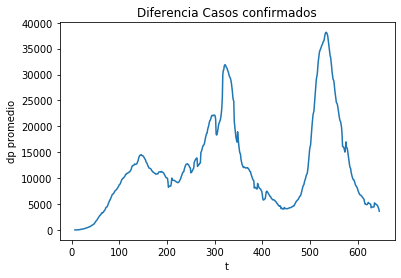

In [43]:
plt.xlabel('t')
plt.ylabel('dp promedio')
plt.title('Diferencia Casos confirmados')
dp_serie_confirmados_acumulados.plot()

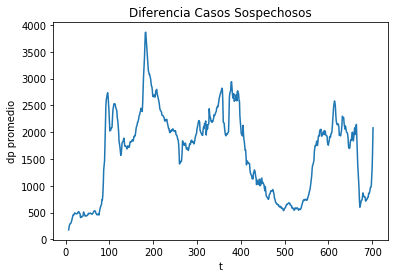

In [44]:
plt.xlabel('t')
plt.ylabel('dp promedio')
plt.title('Diferencia Casos Sospechosos')
dp_serie_sospechosos_acumulados.plot()

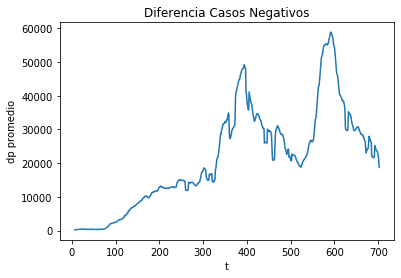

In [45]:
plt.xlabel('t')
plt.ylabel('dp promedio')
plt.title('Diferencia Casos Negativos')
dp_serie_negativos_acumulados.plot()

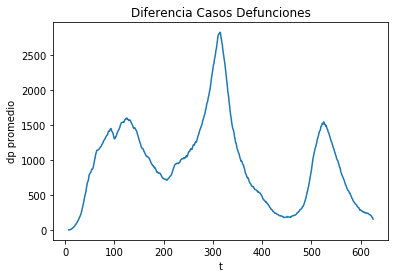

In [46]:
plt.xlabel('t')
plt.ylabel('dp promedio')
plt.title('Diferencia Casos Defunciones')
dp_serie_defunciones_acumulados.plot()

Graficas regunda diferencia de casos acumulados

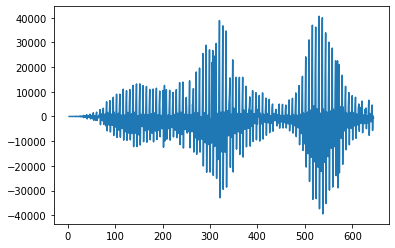

In [60]:
d2p_acumulados_confirmados = np.diff(dp_acumulados_confirmados,2)
plt.plot(t_confirmados[3:], d2p_acumulados_confirmados)

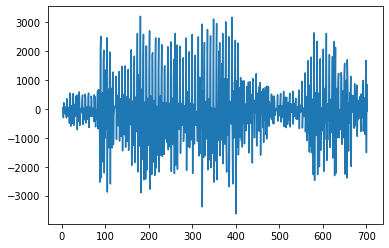

In [63]:
d2p_acumulados_sospechosos = np.diff(dp_acumulados_sospechosos,2)
plt.plot(t_sospechosos[3:], d2p_acumulados_sospechosos)

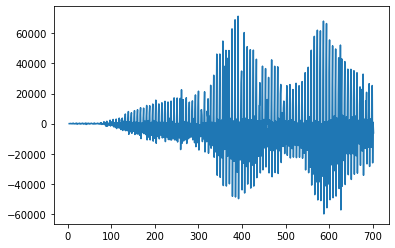

In [64]:
d2p_acumulados_negativos = np.diff(dp_acumulados_negativos,2)
plt.plot(t_negativos[3:], d2p_acumulados_negativos)

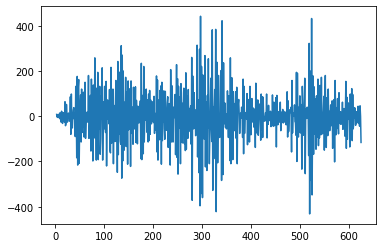

In [65]:
d2p_acumulados_defunciones = np.diff(dp_acumulados_defunciones,2)
plt.plot(t_defunciones[3:], d2p_acumulados_defunciones)

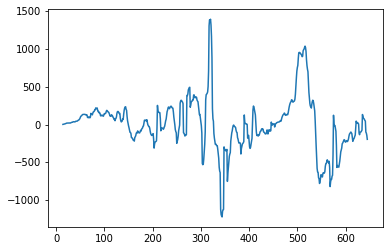

In [73]:
dp2_serie_confirmados_acumulados = dp_serie_confirmados_acumulados.diff().rolling(7).mean()
dp2_serie_confirmados_acumulados.plot()

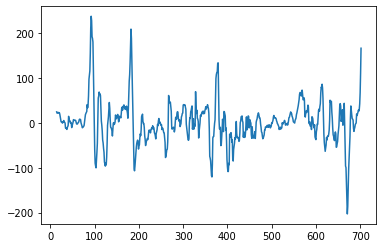

In [74]:
dp2_serie_sospechosos_acumulados = dp_serie_sospechosos_acumulados.diff().rolling(7).mean()
dp2_serie_sospechosos_acumulados.plot()

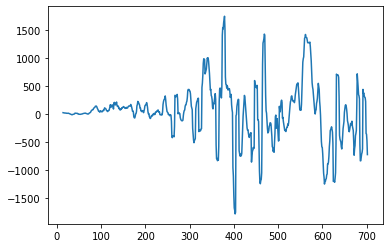

In [75]:
dp2_serie_negativos_acumulados = dp_serie_negativos_acumulados.diff().rolling(7).mean()
dp2_serie_negativos_acumulados.plot()

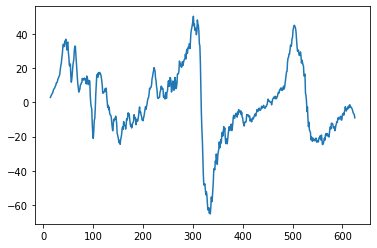

In [76]:
dp2_serie_defunciones_acumulados = dp_serie_defunciones_acumulados.diff().rolling(7).mean()
dp2_serie_defunciones_acumulados.plot()

Fechas a numeros

In [85]:
t_acumulados_confirmados_num = range(len(t_confirmados))
t_acumulados_confirmados_num

range(0, 646)

In [86]:
t_acumulados_sospechosos_num = range(len(t_sospechosos))
t_acumulados_sospechosos_num

range(0, 703)

In [87]:
t_acumulados_negativos_num = range(len(t_negativos))
t_acumulados_negativos_num

range(0, 703)

In [88]:
t_acumulados_defunciones_num = range(len(t_defunciones))
t_acumulados_defunciones_num

range(0, 626)

Regrecion lineal

In [90]:
t_acumulados_confirmados_mean = np.mean(t_acumulados_confirmados_num)
t_acumulados_confirmados_mean

322.5

In [92]:
p_acumulados_mean = np.mean(p_confirmados)
p_acumulados_mean 

3390784.427244582

In [22]:
# https://mathworld.wolfram.com/LeastSquaresFitting.html
# b1 = <dt,dp>/<dt,dt>
b1 = np.dot(t_num - t_mean, p-p_mean)/np.dot(t_num - t_mean, t_num - t_mean)
b1

12767.189657757282

In [23]:
# y ~ b0 + b1*x
# y_mean = b0 + b1*x_mean
b0 = p_mean - b1*t_mean
b0

-897907.5399782914

In [24]:
from datetime import datetime

FORMATO = '%d-%m-%Y'
t0 = datetime.strptime(t[0], FORMATO)
t0

datetime.datetime(2020, 2, 18, 0, 0)

In [25]:
tf = datetime.strptime(t[-1], FORMATO)
tf

datetime.datetime(2021, 9, 16, 0, 0)

In [26]:
tf-t0

datetime.timedelta(days=576)

In [27]:
(tf-t0).days

576

In [29]:
def regresion(ts):
    tt = datetime.strptime(ts, FORMATO)
    return b0+b1*(tt-t0).days

regresion_pred = list(map(regresion, t))
#regresion_pred

In [ ]:
#Aqui elegiremos 2 campos: Porcentaje de personas de estatos bajos, y cantidad promedio de habitaciones por vivienda.
X = confirmados_acumulados3[0]
Y = confirmados_acumulados3[1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

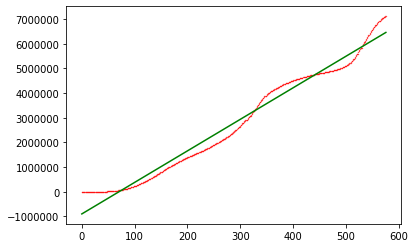

In [30]:
plt.plot(t_num,regresion_pred, c='g')
plt.scatter(t_num, p, c='r', s=.1)
plt.show()

In [31]:
def metricas(p, p_pred):    
    MAE =  np.mean(np.abs(p-p_pred))
    print('Error absoluto medio: ', MAE)
    MSE = np.mean((p-p_pred)**2)
    RMSE = np.sqrt(MSE)
    print('Raíz del error cuadrático medio: ', RMSE)
    p_prom = np.mean(p)
    R2 = 1 - np.sum((p-p_pred)**2)/np.sum((p-p_prom)**2)
    print('Factor R-cuadrático: ', R2)

In [32]:
p_mean

2779043.081455806

In [33]:
metricas(p, regresion_pred)

Error absoluto medio:  290000.10603482794
Raíz del error cuadrático medio:  334831.5317460415
Factor R-cuadrático:  0.9758087825008067


In [93]:
confirmados_acumulados3

0            0
1            8
2           12
3           16
4           20
        ...   
641    7777782
642    7783884
643    7788758
644    7792640
645    7794886
Name: Casos_Confirmados, Length: 646, dtype: int64